In [19]:
import geopandas as gpd
import os
from glob import glob

In [32]:
main_path = '/app'
source_path = 'data/etiquetados_por_plates/etiquetados'
destination_path = 'assets'
files = glob(os.path.join(main_path, source_path, '*', '*'))
files

['/app/data/etiquetados_por_plates/etiquetados/amenities/actual',
 '/app/data/etiquetados_por_plates/etiquetados/amenities/future',
 '/app/data/etiquetados_por_plates/etiquetados/blocks/actual',
 '/app/data/etiquetados_por_plates/etiquetados/blocks/future',
 '/app/data/etiquetados_por_plates/etiquetados/buildings/actual',
 '/app/data/etiquetados_por_plates/etiquetados/buildings/future',
 '/app/data/etiquetados_por_plates/etiquetados/green_areas/actual',
 '/app/data/etiquetados_por_plates/etiquetados/green_areas/future',
 '/app/data/etiquetados_por_plates/etiquetados/green_areas/utopic',
 '/app/data/etiquetados_por_plates/etiquetados/land_uses/actual',
 '/app/data/etiquetados_por_plates/etiquetados/land_uses/future']

In [39]:
traductor = {
    'q_resident': 'q_residents',
    'area_predi': 'area_predio',
}

for file in files:
    gdf = gpd.read_file(file)
    gdf['plate_id'].fillna(0, inplace=True)
    gdf.rename(columns=traductor, inplace=True)
    output_name = file.replace(source_path, destination_path)
    output_name = f'{output_name}.parquet'
    gdf = gdf.to_crs(32718)
    gdf.to_parquet(output_name)
    # print(gdf.crs)

<Axes: >

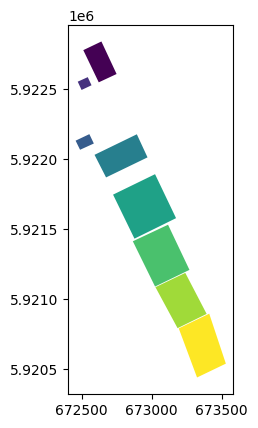

In [45]:
gpd.read_file('/app/assets/plates/all').plot(column='Id')